# About The Data

The King County House Price dataset is a real estate dataset that provides information about house sales in King County, Washington, USA. It contains various features related to the houses, such as the number of bedrooms, bathrooms, square footage, location, condition, and more. 

This dataset was downloaded from kaggle and EDA is performed on it to find some relevant insights. ML predictions is also performed to identify the best algorithm for predicting house prices in King County. 


## overview of the metadata :

id: Unique identifier for each house

date: Date of the house sale

price: Sale price of the house (target variable)

bedrooms: Number of bedrooms in the house

bathrooms: Number of bathrooms in the house

sqft_living: Square footage of the living area

sqft_lot: Square footage of the lot

floors: Number of floors in the house

waterfront: Indicates if the house has a waterfront view (1 if yes, 0 if no)

view: Number of times the house has been viewed

condition: Overall condition of the house

grade: Overall grade given to the house based on King County grading system

sqft_above: Square footage of the house above ground level

sqft_basement: Square footage of the house's basement

yr_built: Year the house was built

yr_renovated: Year the house was last renovated

zipcode: Zip code of the house's location

lat: Latitude coordinate of the house's location

long: Longitude coordinate of the house's location

sqft_living15: Square footage of the living area for the nearest 15 neighbors

sqft_lot15: Square footage of the lot for the nearest 15 neighbors


In [1]:
# import important libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#read data into a DataFrame and print the first 5 rows
house_sale_df=pd.read_csv('/Users/kofi/Desktop/data 4 practice/kc_house_data.csv')
house_sale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_sale_df.shape

(21613, 21)

In [4]:
# data types
house_sale_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# statistical summary
house_sale_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [6]:
# convert the date column to string
house_sale_df['date'] = house_sale_df['date'].astype(str)

# remove the character 'T' from the date string

house_sale_df['date']=house_sale_df['date'].str.replace('T','')

# Change date to datetime format
house_sale_df['date']=pd.to_datetime(house_sale_df['date'])


In [7]:
# remove the 'id' column

house_sale_df.drop(['id'],axis=1,inplace=True)

In [8]:
# count all missing or NAN values
house_sale_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset

In [9]:
# Print the modified DataFrame

house_sale_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Analysis

In [10]:
# Get the numeric data from the DataFrame
house_df = house_sale_df.select_dtypes(include=[np.number])


## HeatMap Correlation Between Variables

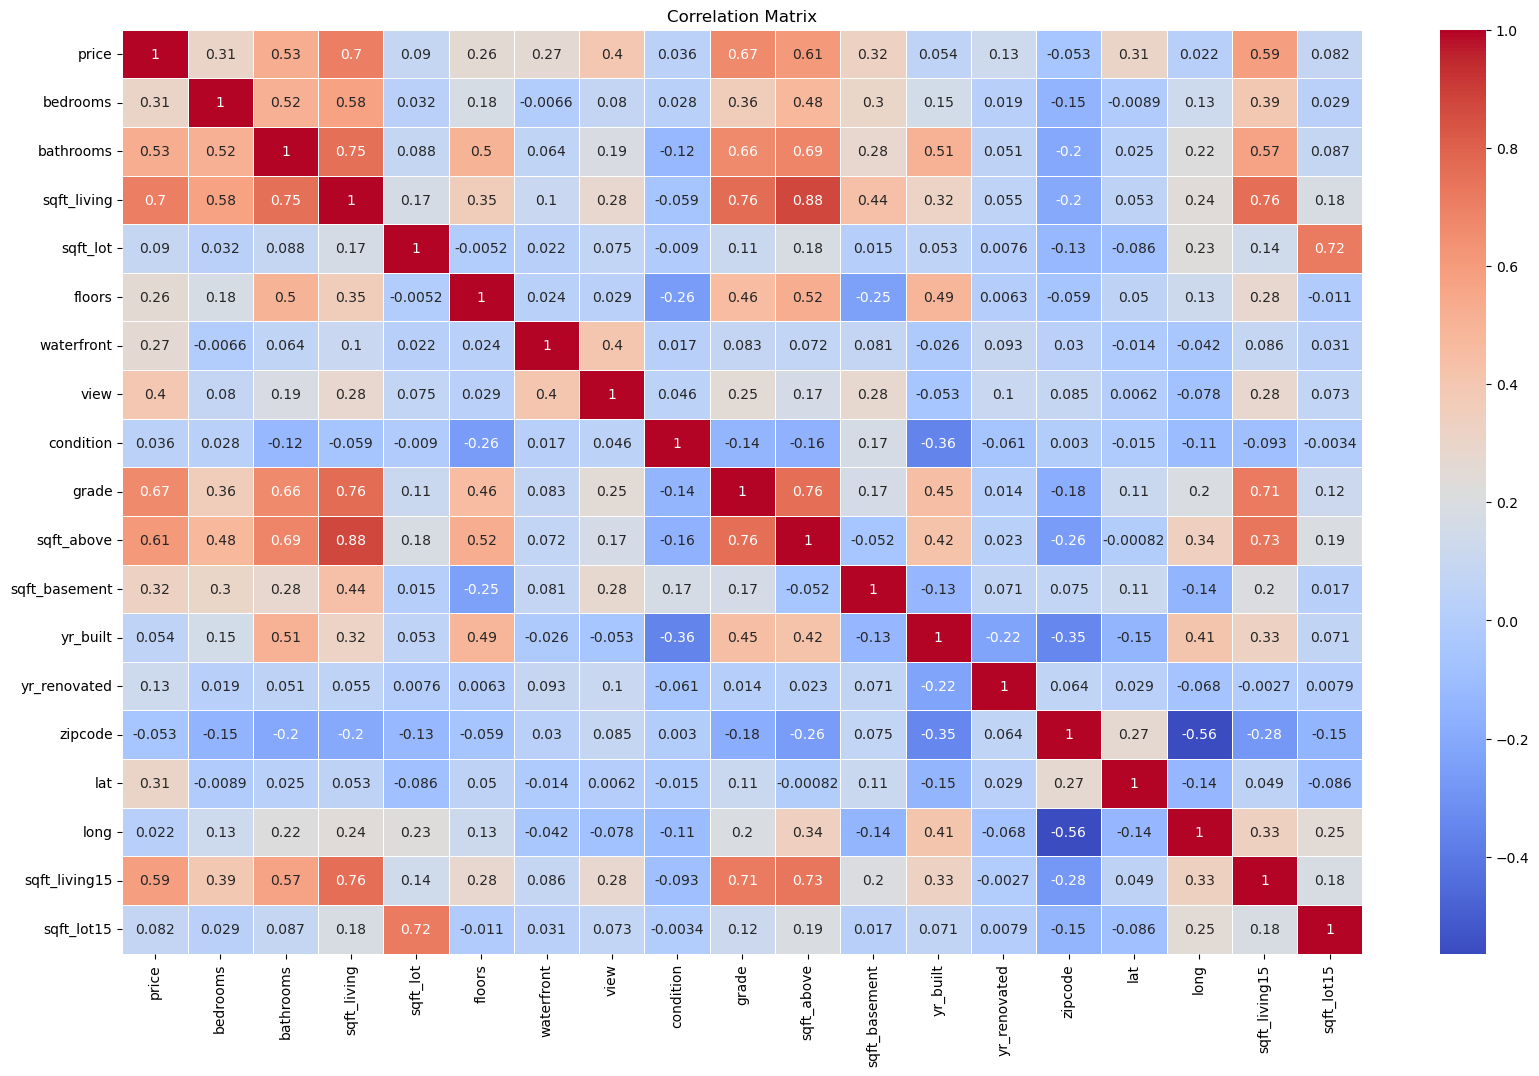

In [11]:
# calculates the correlation between all pairs of variables in the dataset

corr_matrix=house_df.corr()

# plot the correlation
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,cmap='coolwarm',linewidths=0.5, annot=True)
plt.title('Correlation Matrix')
plt.show()

This Heatmap shows the relationship among variables

## 1. Which features are most correlated with house prices?

### a. Heatmap

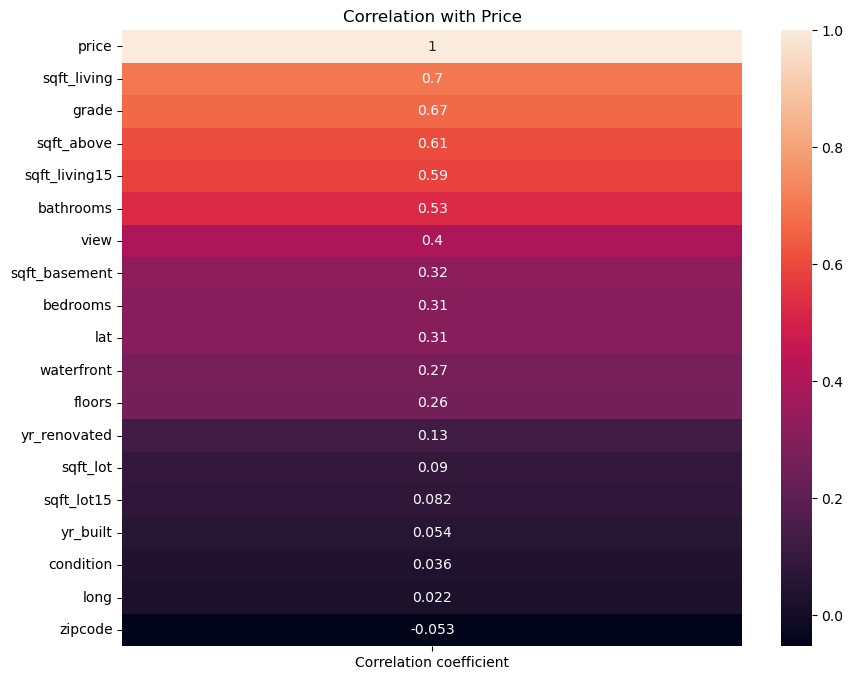

In [12]:
# use the corr() function
corr_matrix=house_df.corr()

# Calculate the correlation between 'price' and other variables 
corr_price = house_df.corr()['price'].sort_values(ascending=False)

# Create a DataFrame containing the correlated values
price_df_corr = pd.DataFrame(corr_price)

# Assign a new column name to the DataFrame
price_df_corr.columns = ['Correlation coefficient']


# Plot the correlation values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(price_df_corr, annot=True)
plt.title('Correlation with Price')
plt.show()

5 variables that significantly affected the house price in King County are sqft_living, grade, sqft_above, sqft_living15, and bathrooms.

### b. Scatter Plot

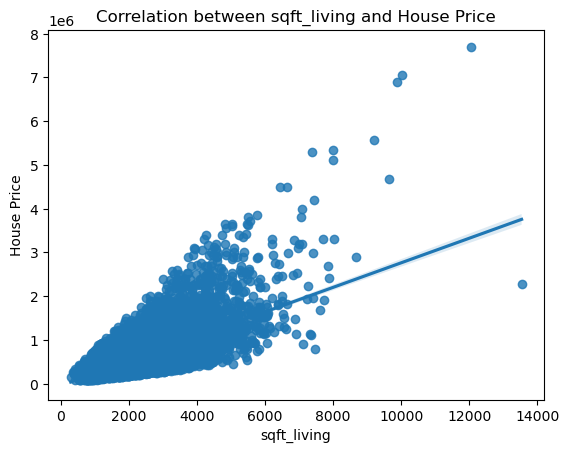

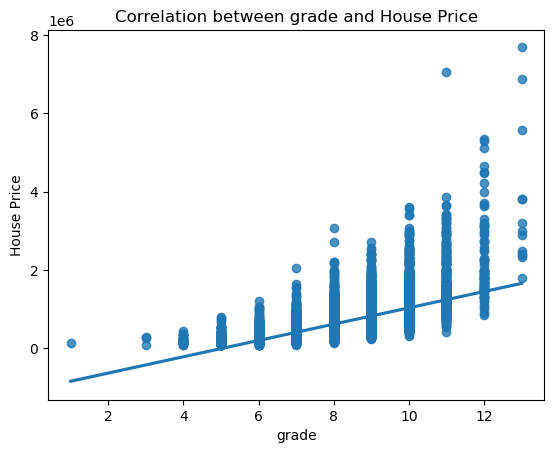

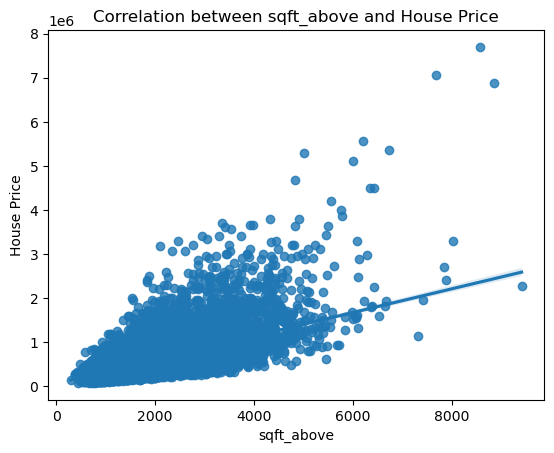

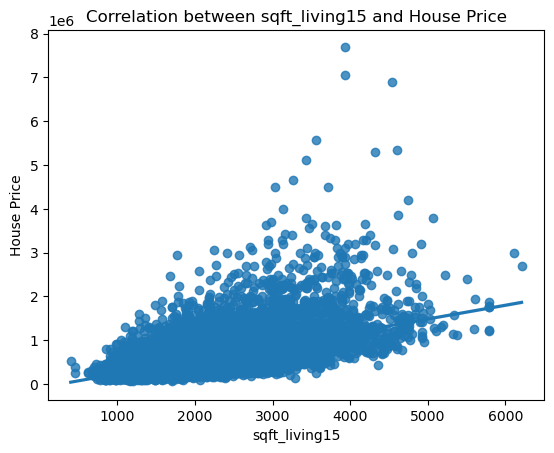

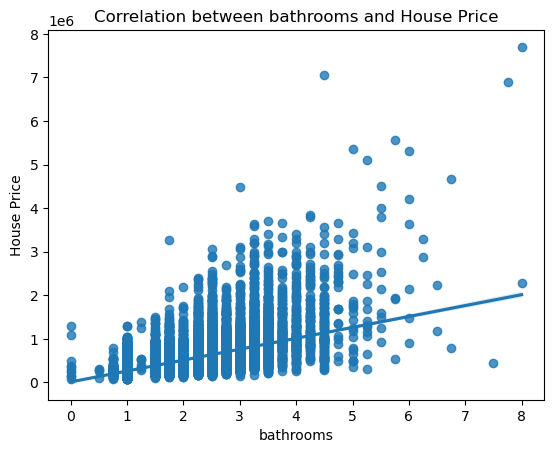

In [13]:
# Create reg plot of highly correlated numeric features
numeric_features = ['sqft_living', 'grade','sqft_above', 'sqft_living15','bathrooms']
for feature in numeric_features:
    #plt.figure(figsize=(10,8))
    sns.regplot(data=house_df, x=feature, y='price')
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.title(f'Correlation between {feature} and House Price')
    plt.show()

From the regplot, we see a positive correlation between the house price and the selected features

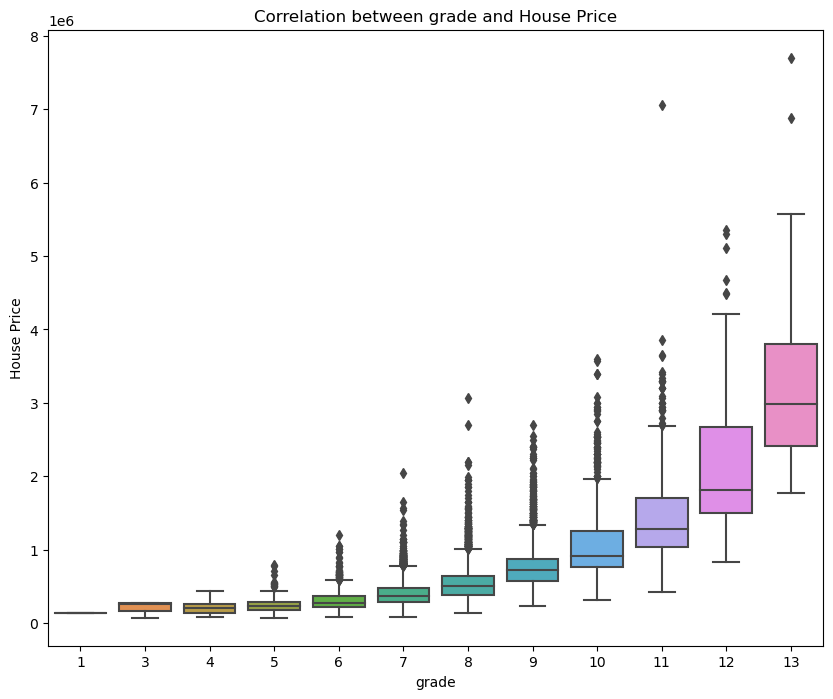

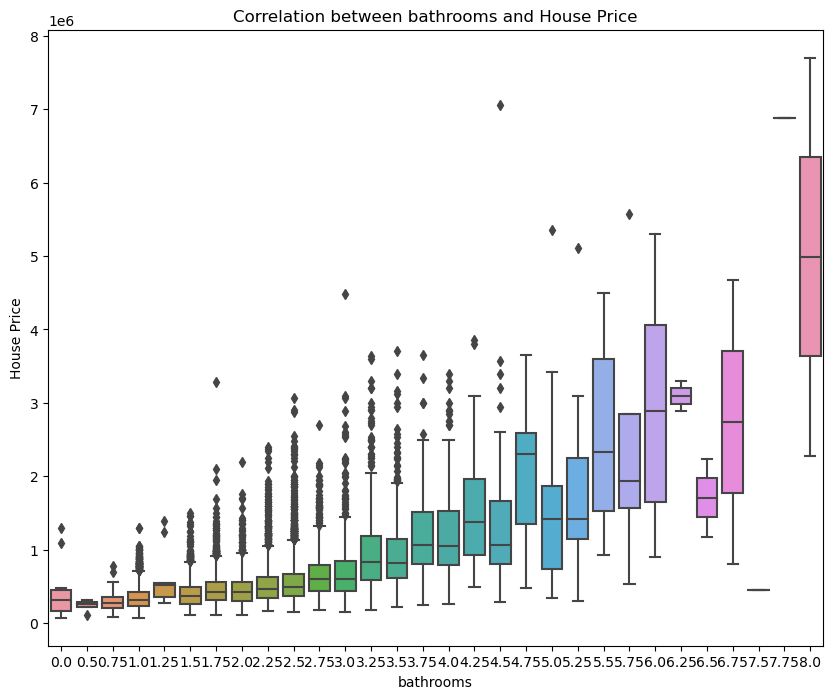

In [14]:
# Create box plot for bathrooms and grade
features = ['grade','bathrooms']
for feature in features:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=house_df, x=feature, y='price')
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.title(f'Correlation between {feature} and House Price')
    plt.show()

The boxplot shows a strong positive correlation between house price and grade, conversely, the correlation with bathrooms is moderately positive

## 2. What is the distribution of house prices in King County?

/var/folders/_0/4_8y36sd2nb1dhc4xvwgmkc00000gn/T/ipykernel_9472/205094658.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(house_df['price'], shade=True)


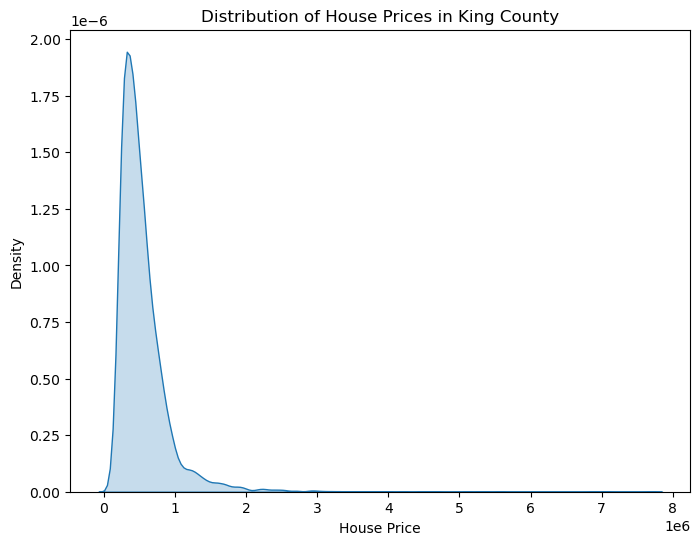

In [15]:
# Plotting the distribution of house prices using a KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(house_df['price'], shade=True)
plt.xlabel('House Price')
plt.ylabel('Density')
plt.title('Distribution of House Prices in King County')
plt.show()

In [16]:
# extract the least price of a house
min_price=house_df['price'].min()

#print the minimum price
print('The minimum price of a house in King County is:',min_price)

The minimum price of a house in King County is: 75000.0


Prices of most houses in King County ranges between 0 and 1 million. however, It is wealth knowing that no house is at a price of zero (0). This makes it good for analysis.

## 3. Are there any geographic trends in house prices?

### a. Compare house prices across different zip codes using a regression plot

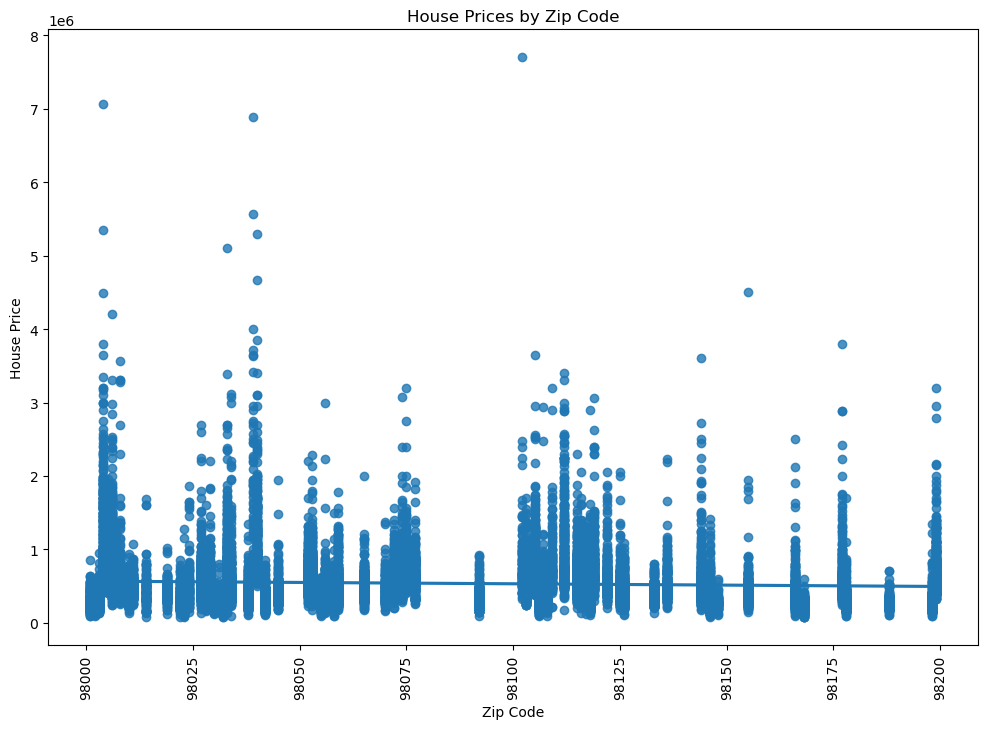

In [17]:
## Calculate the median house price for each zip code
price_zipcode = house_df.groupby('zipcode')['price'].median()

# Sort the zip codes based on median house price 
sorted_zipcodes = price_zipcode.sort_values().index

# Create the regression plot
plt.figure(figsize=(12, 8))
sns.regplot(x='zipcode', y='price', data=house_df)
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('House Price')
plt.title('House Prices by Zip Code')
plt.show()

we can see clearly that the zipcode is negatively correlated with the house price

### b. Compare house prices across different location using a scatter plot

In [18]:
price = house_df['price']
latitude = house_df['lat']
longitude = house_df['long']

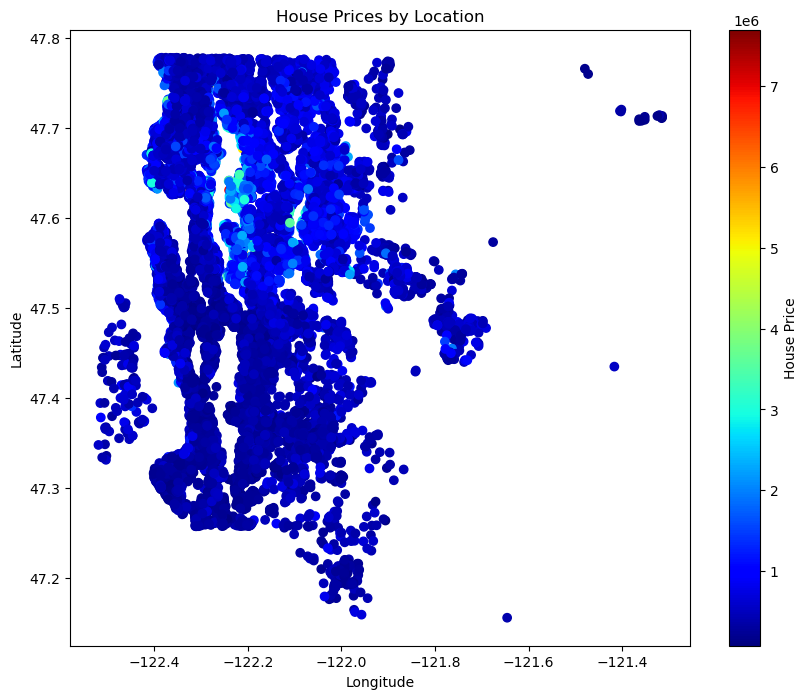

In [19]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=price, cmap='jet')
plt.colorbar(label='House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

Deep blue color in an area shows houses with cheaper prices, while light green color shows areas with higher house prices

## 4. Are there any  trends in house sales or prices?

### a. Yearly price trend in house sales in King County

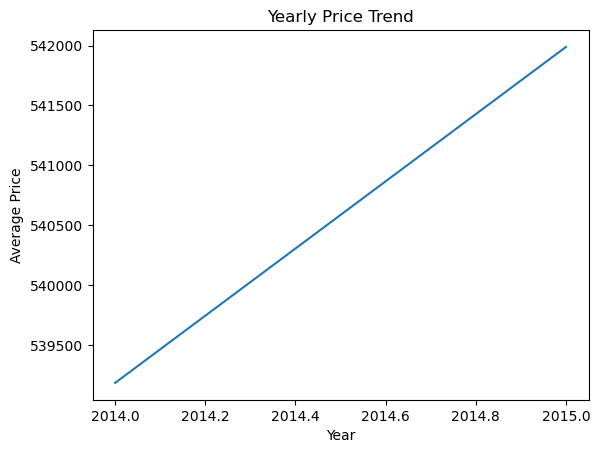

In [20]:
# Extract year from the date column
house_sale_df['year'] = house_sale_df['date'].dt.year

# Group the data by year and calculate the average price
yearly_prices = house_sale_df.groupby('year')['price'].mean()

# Plotting the line plot
plt.plot(yearly_prices.index, yearly_prices.values)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Yearly Price Trend')
plt.show()

There is an increase in house prices over the years in King County 

### b. Monthly price trend in house sales in King County

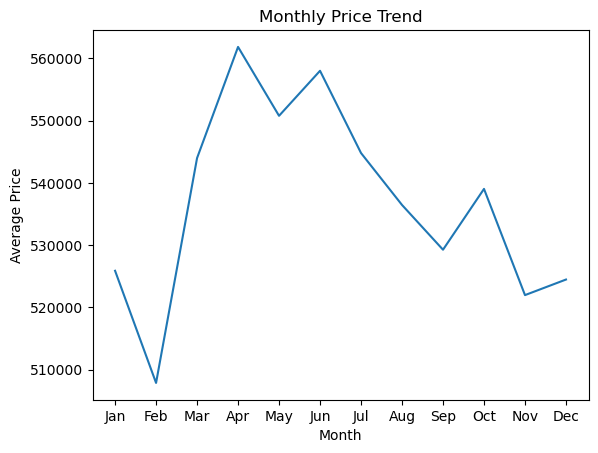

In [21]:
# Extract month from the date column
house_sale_df['month'] = house_sale_df['date'].dt.month

# Group the data by month and calculate the average price
monthly_prices = house_sale_df.groupby('month')['price'].mean()

# Plotting the line plot
plt.plot(monthly_prices.index, monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Price Trend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

House prices are higher and expensive in the month of April. However, the prices are lower and cheaper in the month of February. we can also see that prices increases sharply from February to April and decreases gradualy until November

### c. Seasonal price trend in house sales in King County

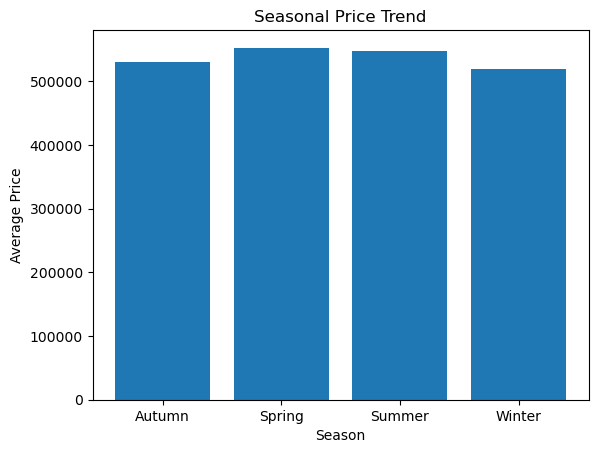

In [22]:
# Extract month from the date column
house_sale_df['month'] = house_sale_df['date'].dt.month

# Define the season categories
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Assign seasons to each row based on the month
house_sale_df['season'] = house_sale_df['month'].apply(lambda x:next(season for season,months in seasons.items() if x in months))

# Group the data by season and calculate the average price
seasonal_prices = house_sale_df.groupby('season')['price'].mean()

# Plotting the bar plot
plt.bar(seasonal_prices.index, seasonal_prices.values)
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Seasonal Price Trend')
plt.show()

House prices are not affected by Seasonal times

## 5. What is the impact of renovations on house prices?

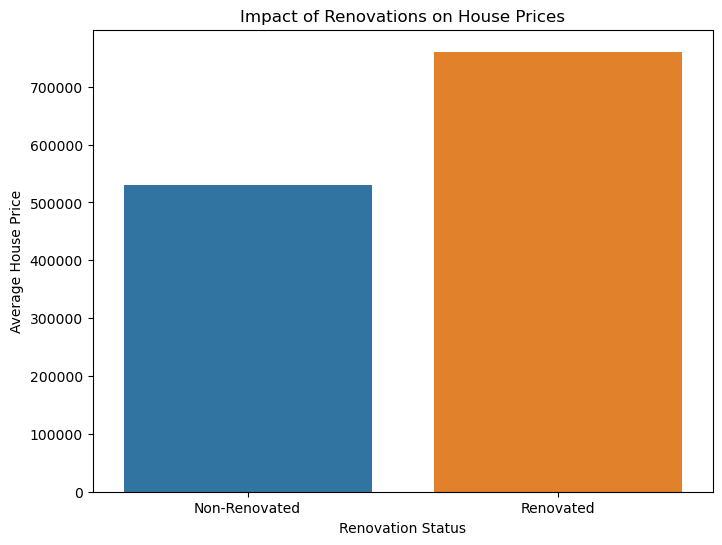

In [23]:
# extract and create a binary columns for the renovated and non-renovated houses

house_df['renovated'] = np.where(house_df['yr_renovated'] > 0, 1, 0)

# Group the houses based on their renovation status and calculate the average house prices for each group.

price_renovation = house_df.groupby('renovated')['price'].mean()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=price_renovation.index, y=price_renovation.values)
plt.xticks([0, 1], ['Non-Renovated', 'Renovated'])
plt.xlabel('Renovation Status')
plt.ylabel('Average House Price')
plt.title('Impact of Renovations on House Prices')
plt.show()


We can observe from the plot that renovated houses comes with an increased prices

## 6. What is the impact of Grade on House Price?

Text(0.5, 1.0, 'Impact of Grade on House Price')

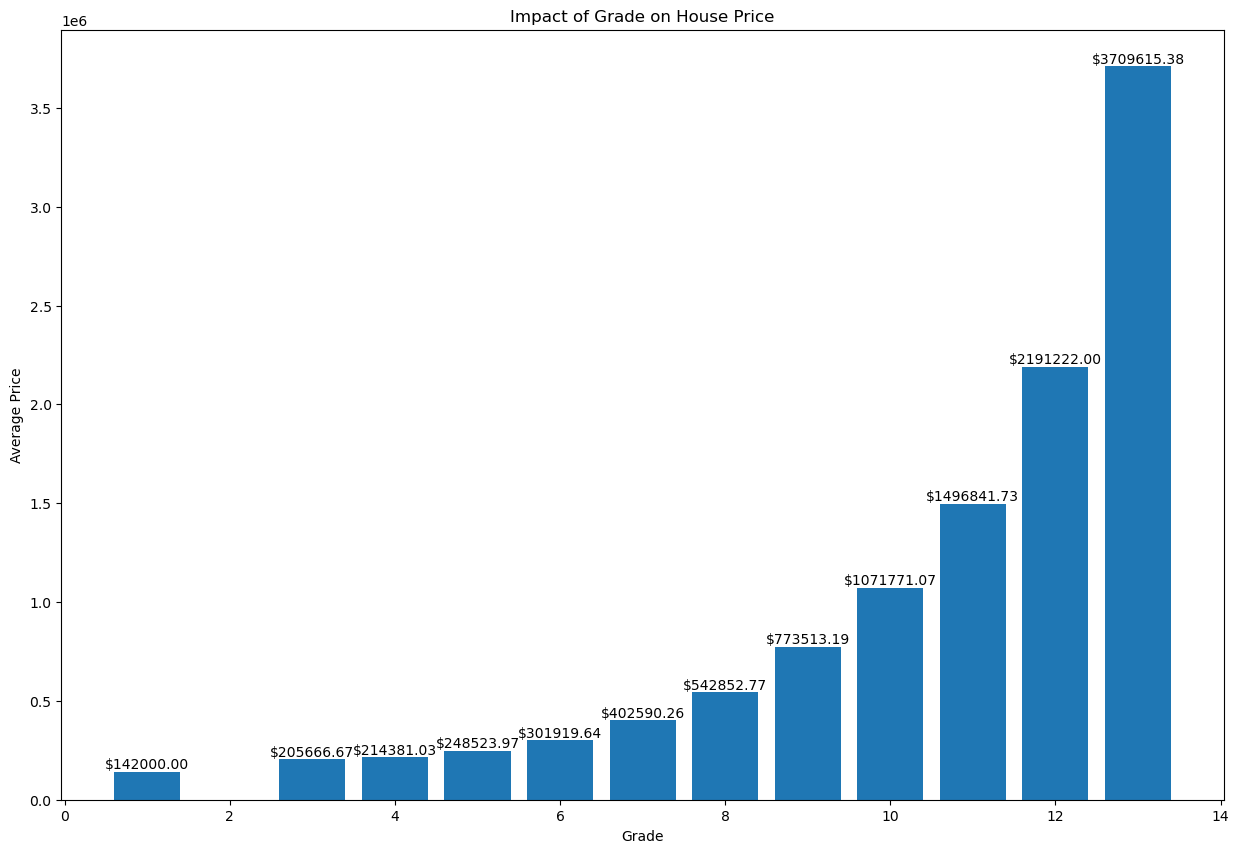

In [24]:
# Calculate the average house price for each grade
average_prices = house_df.groupby('grade')['price'].mean()

# Set the grade levels as x-axis and average prices as y-axis
grades = average_prices.index
prices = average_prices.values

# set figure size
plt.figure(figsize=(15,10))
# Create the bar plot
plt.bar(grades, prices)

# Add annotations to the bars
for grade, price in zip(grades, prices):
    plt.annotate(f"${price:.2f}", (grade, price), ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.title('Impact of Grade on House Price')

Grading comes with higher prices. The higher the grade, the higher the price.

# Modelling

# Data Split

In [25]:
# Split the data into features (X) and target variable (y)
X = house_df.drop('price', axis=1)
y = house_df['price']

In [26]:
# Standardize the data in X 
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.9433552 ,
        -0.26071541, -0.21013501],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.43268619,
        -0.18786773,  4.75884527],
       [-1.47395936, -1.44746357, -1.42625404, ...,  1.07013975,
        -0.17237524, -0.21013501],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.39414129, -0.21013501],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.8412214 ,
        -0.42051149, -0.21013501],
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.41794772, -0.21013501]])

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Print the shape of the training and testing sets
print("Training set for X-data:", X_train.shape,'and Training set for y-data', y_train.shape)
print("Testing set for X-data:", X_test.shape, 'and Testing set for y-data', y_test.shape)

Training set for X-data: (17290, 19) and Training set for y-data (17290,)
Testing set for X-data: (4323, 19) and Testing set for y-data (4323,)


# Building Different Models and Selecting The Best Model 

## Decision Tree Regressor Model

In [28]:
# create a Decision Tree Regressor Object
tree_model=DecisionTreeRegressor()


# train the data on the train data
tree_model.fit(X_train,y_train)

# predict on the testd data
y_pred=tree_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test,y_pred)
dt_r2 = r2_score (y_test,y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", dt_mse)
print("R^2 Score: ", dt_r2)

Mean Squared Error:  32629253570.859413
R^2 Score:  0.7457999022077635


## K-Nearest Neighbors (KNN) Model 

In [29]:
# Create a KNN regressor object
knn_model = KNeighborsRegressor()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", knn_mse)
print("R^2 Score: ", knn_r2)

Mean Squared Error:  25102245651.399147
R^2 Score:  0.8044394952053346


## Random Forests model 

In [30]:
# Create a Random Forest regressor object
rf_model = RandomForestRegressor()

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", rf_mse)
print("R^2 Score: ", rf_r2)

Mean Squared Error:  14199799554.381311
R^2 Score:  0.8893756356542111


## Gradient Boosting Model

In [31]:
# Create a Gradient Boosting regressor object
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: ", gb_mse)
print("R^2 Score: ", gb_r2)

Mean Squared Error:  15655651604.701674
R^2 Score:  0.878033735577987


# Best Model Selection

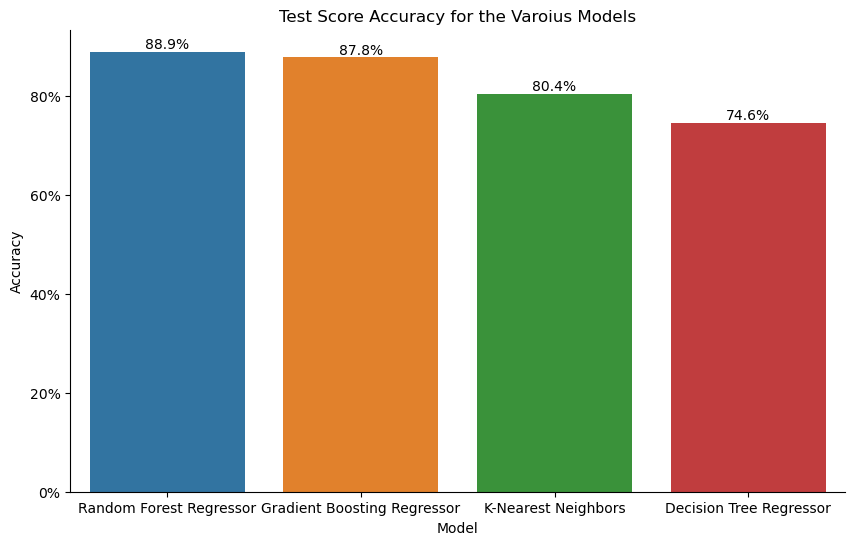

In [32]:
table={'Model':['Decision Tree Regressor','K-Nearest Neighbors','Random Forest Regressor','Gradient Boosting Regressor'],
       'Accuracy Scores':[dt_r2, knn_r2, rf_r2, gb_r2]}

data= pd.DataFrame(table).sort_values(by='Accuracy Scores',ascending =False)


plt.figure(figsize=(10,6))
ax=sns.barplot(x='Model', y='Accuracy Scores', data=data)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x*100)))
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()*100), (p.get_x()+0.4, p.get_height()), 
                ha='center', va='bottom',color= 'black')
plt.title('Test Score Accuracy for the Varoius Models')
plt.show()

Random Forest Regressor performances better. Hence, it is the best Model for this project.

   # Thanks 